***Shreyansh Singh***

In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                    # For plotting graphs
import matplotlib.pyplot as plt             # For data visualization
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
# Reading the csv file from the link
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
# Reading the TOP 10 Rows
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Checking the size of our dataset (rows X columns)
data.shape

(25, 2)

Text(0.5, 1.0, 'Hours vs Percentage')

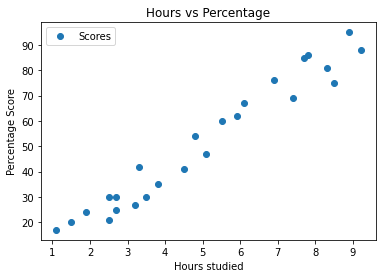

In [6]:
# Visualising our Dataset components
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')

**It is visible that there is a positive linear relation between the Hours Studied and Percentage Score**

<AxesSubplot:xlabel='Hours', ylabel='count'>

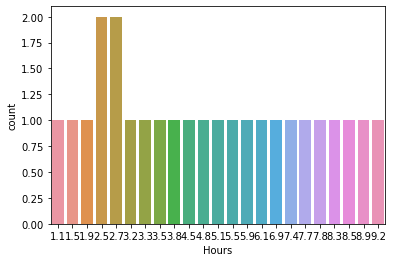

In [7]:
#using seaborn
sns.countplot(x='Hours',data=data)

***Preparing data for regression using supervised learning***

In [8]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

In [9]:
#Dividing the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test= train_test_split(X,Y,test_size=0.2,random_state=4)

In [10]:
#Training our data sets
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

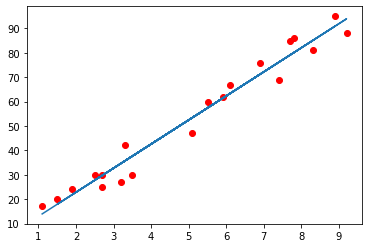

In [11]:
#Plotting regression line for training
line = regressor.coef_*X_train+regressor.intercept_
plt.scatter(X_train,Y_train,color='red',marker='o')
plt.plot(X_train,line)

***Now make predictions***

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
#Comparing actual values vs predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


In [14]:
#Predicting the data for 9.25hrs/day(asked in task)
print('Predicted score for a student studying 9.25 hrs/day is:',regressor.predict([[9.25]]))

Predicted score for a student studying 9.25 hrs/day is: [94.43733048]


***Evaluating our model***

In [15]:
mse=metrics.mean_absolute_error(Y_test,y_pred)
rootsqe=np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

In [16]:
print(f'Mean absolute error = {mse}')
print(f'Root mean squared error = {rootsqe} ')

Mean absolute error = 6.8866403471761775
Root mean squared error = 7.43929957468606 
